# Introduction

In the business world, advertising is a crucial element for any company looking to promote its products or services. However, advertising costs can be substantial, and businesses need to determine the effectiveness of their advertising campaigns.

This is where sales prediction comes in – it’s a critical aspect of advertising that helps companies understand how much revenue they can expect from their advertising campaigns.

Linear regression is a statistical approach used to analyze the relationship between two or more variables. It’s a commonly used method in sales prediction, and it’s particularly useful for analyzing the impact of advertising on sales.

In this article, we will discuss step by step how linear regression can be applied to predict sales from advertising ads dataset.

### Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset
df= pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
## to check some statastical methods
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
## Checking the missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.columns ## columns in dataset

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.shape # Check no.of rows and columns in the dataset

(200, 4)

In [9]:
df.info() ## Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Domain Analysis

1. should speak about all the attribute including 

                a. input data
                b. target
                
2. explian the relationship btween the attriutes and the target


In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


## Visualising the Data
Let’s now visualize our data using seaborn. We’ll first make a pair plot of all the variables present to visualize which variables are most correlated to Sales.

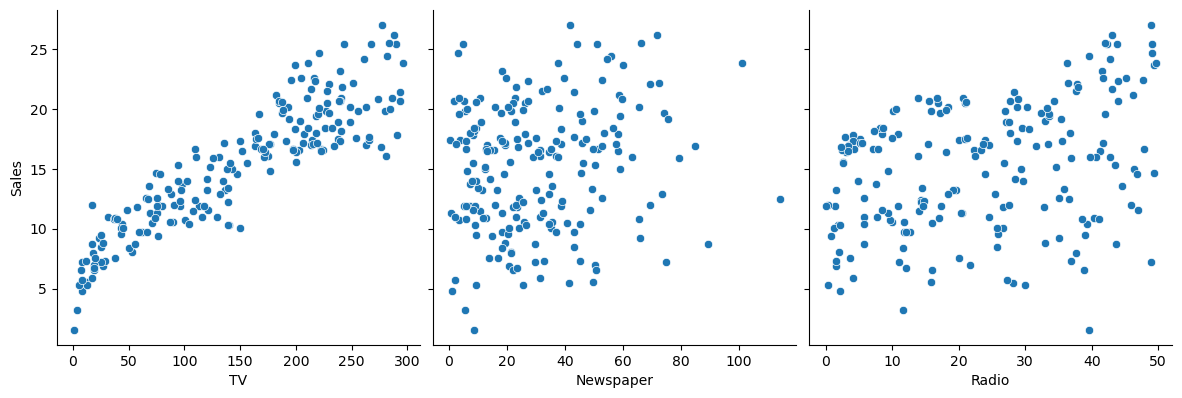

In [42]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

Next, we will plot a heatmap to visualize the multicollinearity in the dataset
### Correlation

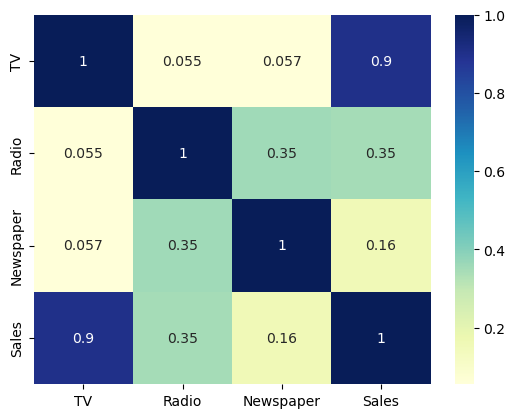

In [47]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### EDA - Exploratory data analysis

1. Univariate analysis

           - analysing the single column
           
2. Bi variate analysis

           - analysing 2 column / 2 features
           
3. multivariate analysis
  
           - all the columns at once

### Univariate 

1. numerical column - histogram ,boxplot

2. categorical column - coutplot

<Axes: ylabel='Density'>

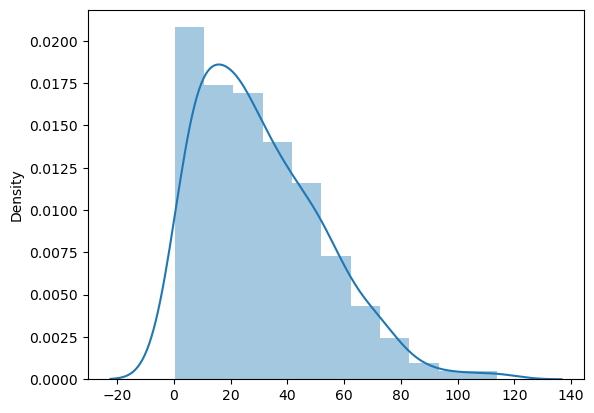

In [15]:
sns.distplot(x=df['Newspaper'])

<Axes: ylabel='Density'>

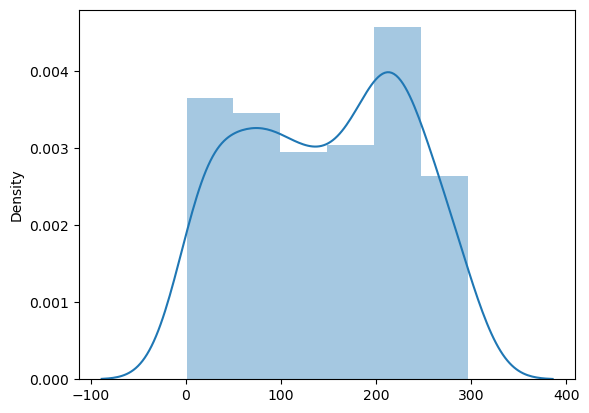

In [20]:
sns.distplot(x=df['TV'])

<Axes: ylabel='Density'>

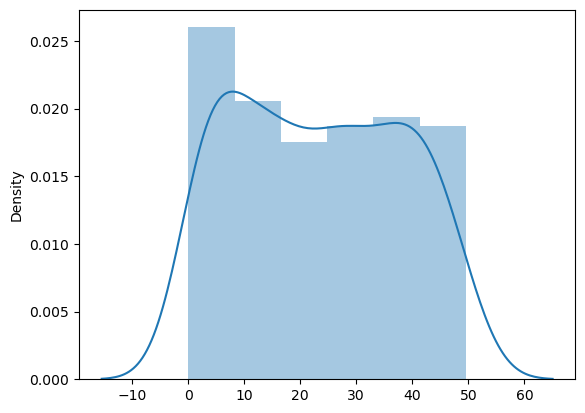

In [21]:
sns.distplot(x=df['Radio'])

<Axes: ylabel='Density'>

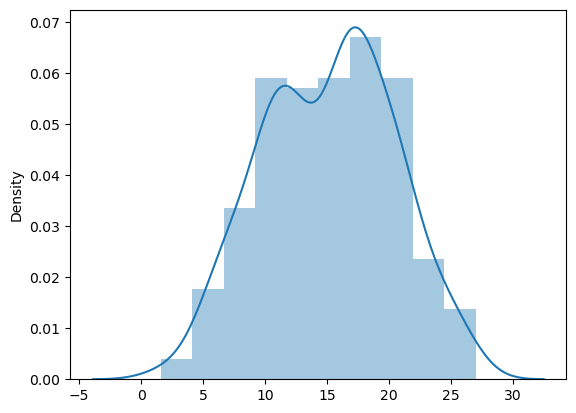

In [22]:
sns.distplot(x=df['Sales'])

Insight : The data is not normally distributed

In [16]:
## similarly the analysis should be done for other columns too

### Bivariate analsysis


1. num vs num

2. num vs cat

- We can plot all the categorical data vs target at once

- we can plot all the numerical data vs target at once

<Axes: xlabel='Newspaper', ylabel='Sales'>

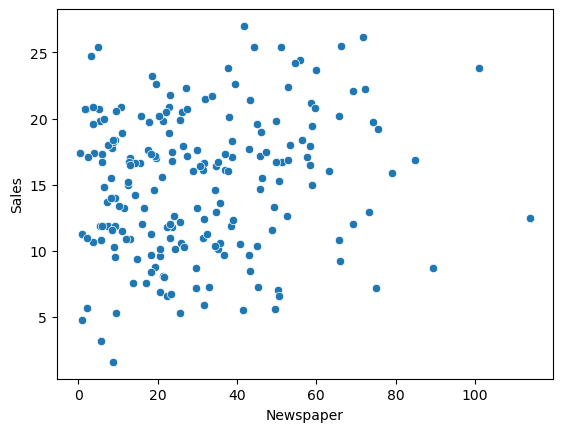

In [19]:
sns.scatterplot(x=df['Newspaper'],y=df['Sales'])

<Axes: xlabel='Radio', ylabel='Sales'>

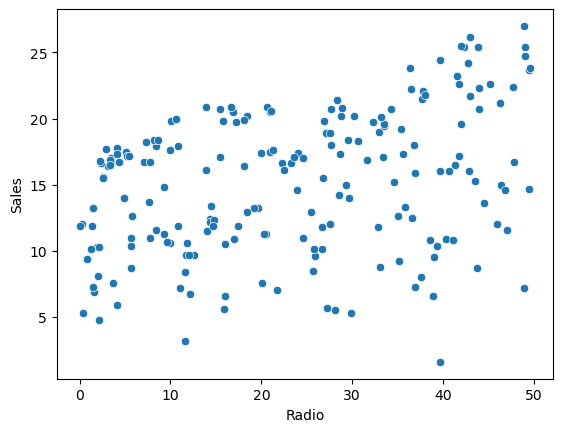

In [24]:
sns.scatterplot(x=df['Radio'],y=df['Sales'])

<Axes: xlabel='TV', ylabel='Sales'>

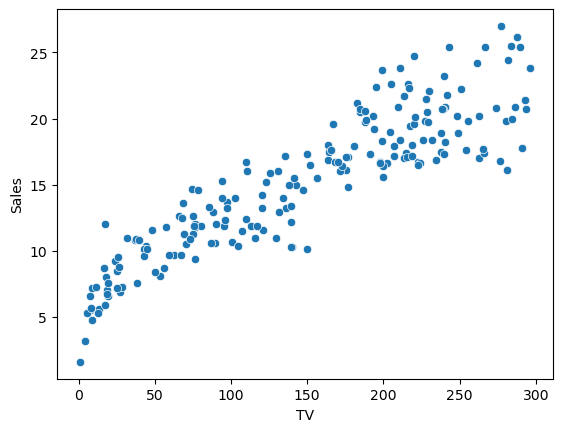

In [25]:
sns.scatterplot(x=df['TV'],y=df['Sales'])

Insight : As the amount spent on radio advertising increases , the sales is increasing too

Insight : As the amount spent on TV advertising increases , the sales is increasing too

### Multivarate analysis

- pairplot

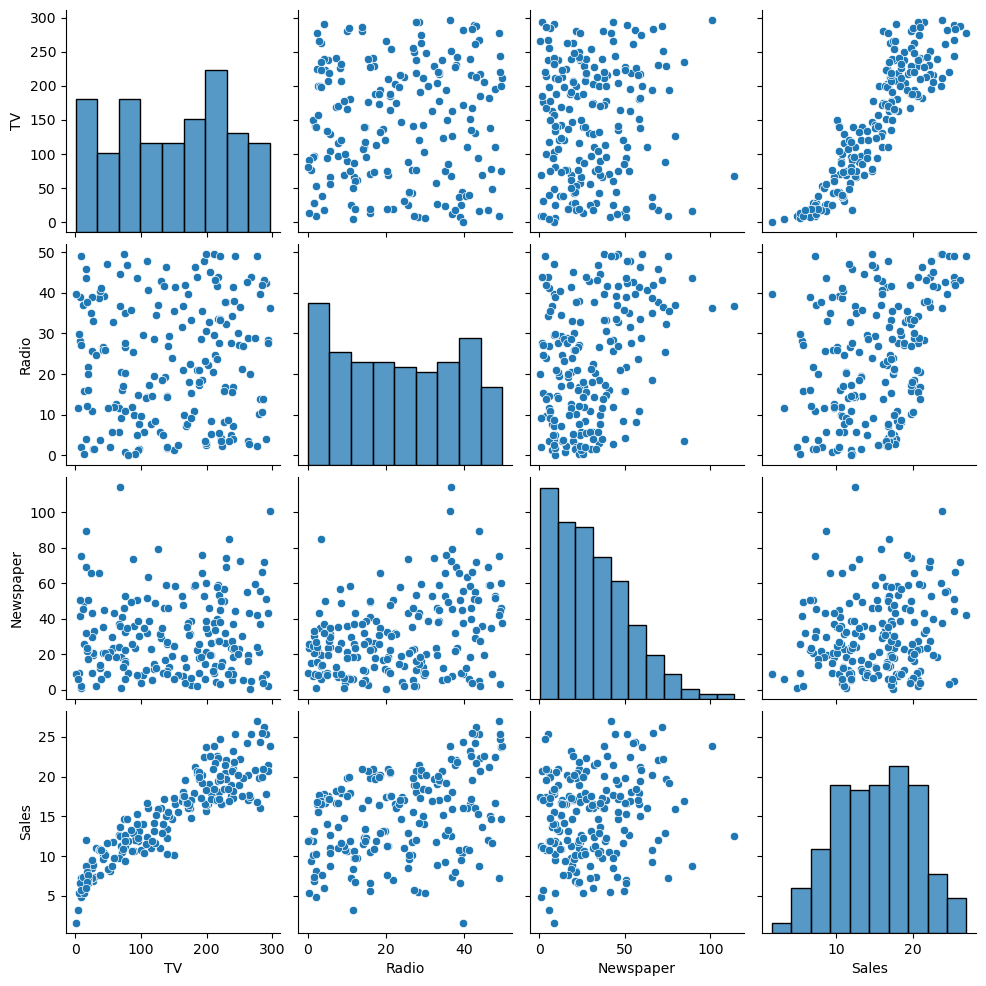

In [26]:
sns.pairplot(df)

<Axes: xlabel='Newspaper'>

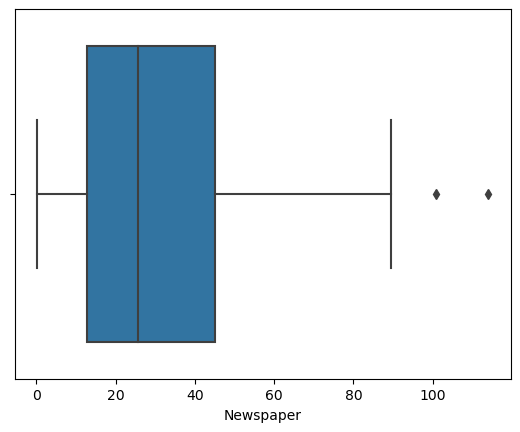

In [32]:
# outliers
# by boxplot we can see whether the data has outier or not
sns.boxplot( x=df['Newspaper'])

## Performing Simple Linear Regression

Generic Steps in the model building using statsmodels
We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [48]:
X=df['TV']
y=df['Sales']

### Train-Test Split
We now need to split our variables into training and testing sets. We’ll perform this by importing train_test_split from the sklearn.model_selection library.

It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Building a Linear Model

In [53]:
import statsmodels.api as sm

In [54]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [55]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.52e-52
Time:                        01:11:29   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

#### Looking at some key statistics from the summary
The values we are concerned with are –

- The coefficients and significance (p-values)
- R-squared
- F statistic and its significance

From the parameters that we get, our linear regression equation becomes:

#### 𝑆𝑎𝑙𝑒𝑠 = 6.948+0.054×𝑇V

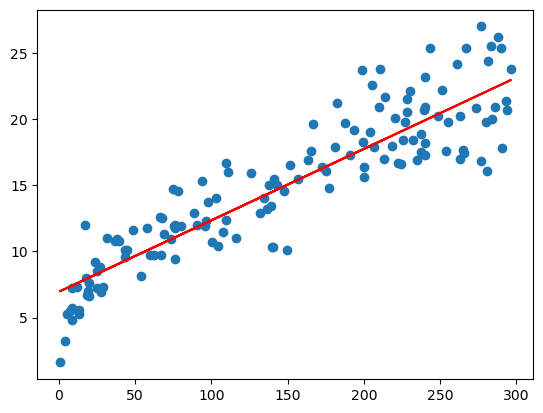

In [61]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'red')
plt.show()

### Predictions on the Test Set
Now that you have fitted a regression line on your train dataset, it’s time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [62]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Looking for RMSE
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662324

In [63]:
r_squared = r2_score(y_test, y_pred)
r_squared


0.7921031601245658

# Conclusion
we have demonstrated in detail how to apply linear regression using stats model for predicting sales from advertising data. By carefully selecting the right variables, preparing and cleaning the data, and selecting an appropriate regression model, businesses can accurately predict sales from advertising ads.

Our analysis resulted in a good R-squared value of 0.7921, which indicates that the linear regression model has a decent fit for the data. This level of accuracy can provide businesses with valuable insights into the effectiveness of their advertising campaigns and enable them to make informed decisions about how to allocate their resources.

However, it’s important to consider the limitations of linear regression, including the assumption of linearity and the potential impact of outliers. By following best practices and analyzing the data accurately, businesses can maximize the effectiveness of their advertising campaigns and achieve a higher return on investment.

#### THANK YOU!!!